In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
file_path = 'Basel.csv'
data=pd.read_csv(file_path, delimiter=',',header=9,skipinitialspace=True)
data

,timestamp,Temperature,Precipitation,Wind Speed,Wind Direction
0,20080101T0200,-0.109471,0.0,0.000000,180.00000
1,20080101T0300,1.900529,0.0,2.397600,89.99999
2,20080101T0400,1.610529,0.0,0.799200,180.00000
3,20080101T0500,1.110529,0.0,0.842431,198.43495
4,20080101T0600,0.820529,0.0,2.527292,161.56505
...,...,...,...,...,...
109145,20200613T1900,16.840528,2.7,15.187138,285.25513
109146,20200613T2000,15.870529,3.2,17.126432,285.33328
109147,20200613T2100,15.230529,0.8,14.368323,280.68490
109148,20200613T2200,14.750529,0.8,13.056318,268.83087


In [3]:
temperature = np.array(data['Temperature'])
num_periods = 360
f_horizon = 1
x_data = temperature[70:(len(temperature)-(num_periods*2))]
x_batches = x_data.reshape(-1, num_periods, 1)

y_data = temperature[71:(len(temperature)-(num_periods*2))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)
print(y_batches.shape)

(301, 360, 1)


In [4]:
def test_data(series, forecast, num):
    testX = temperature[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = temperature[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X_test, Y_test = test_data(temperature, f_horizon, 360*2)
print(X_test.shape)


(2, 360, 1)


In [5]:
tf.compat.v1.reset_default_graph()
inputs = 1
rnn_size =100
output = 1
learning_rate=0.001
dropout_keep_prob = tf.compat.v1.placeholder(tf.float32)

X = tf.compat.v1.placeholder(tf.float32, [None, num_periods, 1])
Y = tf.compat.v1.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu)
rnn_output, states = tf.compat.v1.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)

output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf.compat.v1.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(input_tensor=tf.square(outputs - Y))

accuracy = tf.reduce_mean(input_tensor=tf.cast(tf.equal(tf.argmax(input=logit, axis=1), tf.cast(Y, tf.int64)), tf.float32))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

init=tf.compat.v1.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("softmax/BiasAdd:0", shape=(None, 1), dtype=float32)


In [6]:
epochs = 1000

sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)
saver = tf.compat.v1.train.Saver()

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches, dropout_keep_prob:0.5}
    sess.run(train_step, feed_dict=train_dict)
y_pred=sess.run(outputs, feed_dict={X: X_test})
save_path = saver.save(sess, "models/basel.ckpt")


In [7]:
with tf.compat.v1.Session() as sess:
  # Restore variables from disk.
    saver = tf.compat.v1.train.Saver()
    saver.restore(sess, "models/basel.ckpt")
    y_pred=sess.run(outputs, feed_dict={X: X_test})
    print (y_pred)

INFO:tensorflow:Restoring parameters from models/basel.ckpt
[[[12.623753 ]
  [11.3773575]
  [11.2068615]
  [10.94938  ]
  [10.345932 ]
  [ 9.449583 ]
  [ 8.504969 ]
  [ 8.237566 ]
  [ 7.727129 ]
  [ 7.7863207]
  [ 8.556478 ]
  [10.044237 ]
  [12.991201 ]
  [14.758874 ]
  [14.337796 ]
  [16.37909  ]
  [14.826897 ]
  [15.226946 ]
  [15.304525 ]
  [15.990816 ]
  [15.973309 ]
  [15.278078 ]
  [14.031591 ]
  [13.2966585]
  [12.183022 ]
  [11.586704 ]
  [10.125402 ]
  [ 8.595173 ]
  [ 7.6526065]
  [ 7.2077975]
  [ 6.9383783]
  [ 6.8287396]
  [ 8.246975 ]
  [10.221751 ]
  [12.491518 ]
  [14.299125 ]
  [16.491714 ]
  [18.176003 ]
  [18.898932 ]
  [18.904488 ]
  [19.613228 ]
  [19.82542  ]
  [19.690496 ]
  [19.126768 ]
  [18.52764  ]
  [17.284988 ]
  [15.156029 ]
  [13.521334 ]
  [12.295654 ]
  [11.313014 ]
  [11.306045 ]
  [11.174145 ]
  [11.1488285]
  [11.151192 ]
  [10.659516 ]
  [10.365243 ]
  [10.728641 ]
  [12.2343025]
  [13.992614 ]
  [16.12852  ]
  [17.935282 ]
  [19.448532 ]
  [20.3303

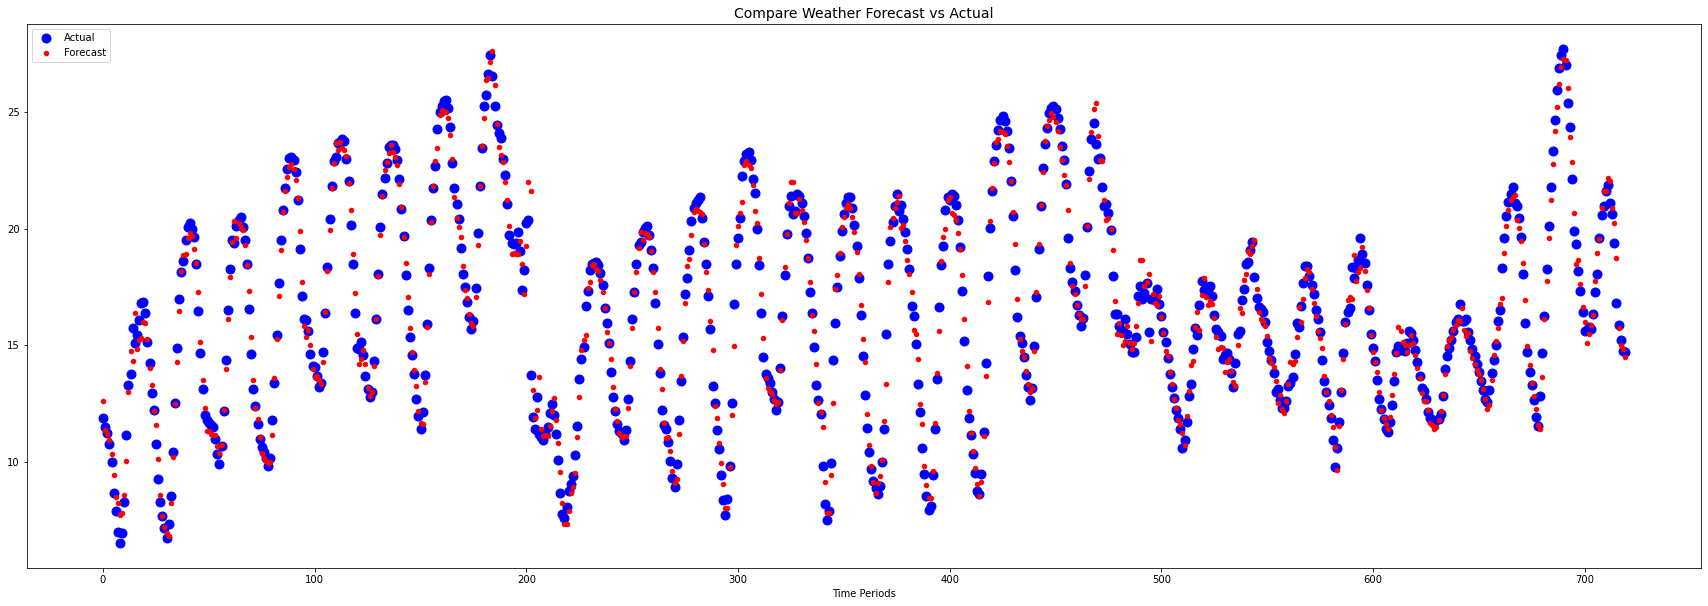

In [8]:
plt.figure(figsize=(30,10))
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)),"bo",  markersize=9, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)),"r.",  markersize=9, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()
